In [261]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rcParams

rcParams['font.family'] = ['Trebuchet MS']
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [277]:
abgrid_long = pd.read_excel("./analysis/abgrid_long.xlsx")
safa_anx =  pd.read_excel("./analysis/safa_anx.xlsx")

## ABGRID

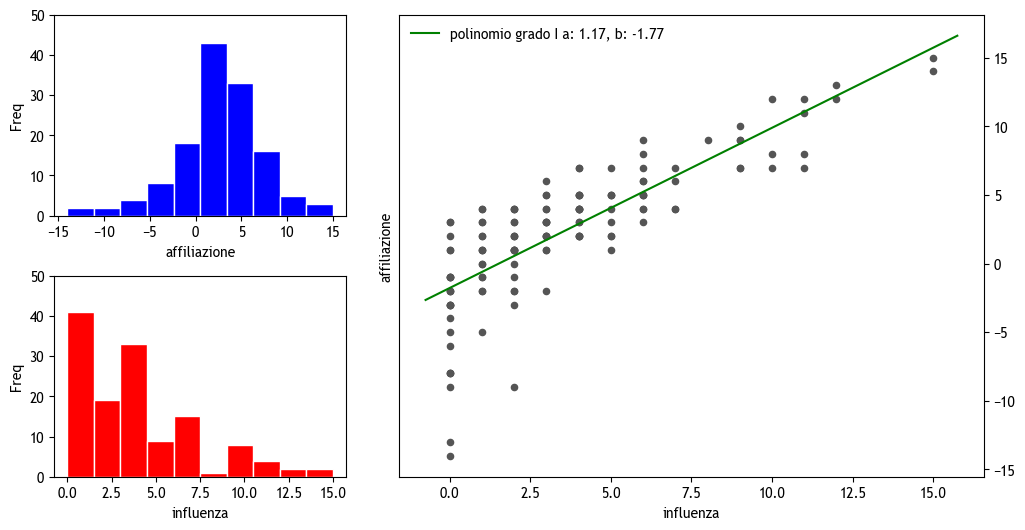

In [275]:
fig = plt.figure(figsize=(12,6))

AFF = "affiliation_coeff_raw"
INF = "influence_coeff_raw"

gs = GridSpec(nrows=2, ncols=2, width_ratios=[1,2], hspace=.3, wspace=.12)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[:,1])

abgrid_long[AFF].plot.hist(ax=ax1, color="#00F", ec='#FFF')
ax1.set_xlabel("affiliazione")

abgrid_long[INF].plot.hist(ax=ax2, color="#F00", ec='#FFF')
ax2.set_xlabel("influenza")

for ax in (ax1, ax2):
    ax.set_ylabel("Freq")
    ax.set_ylim(0,50)


abgrid_long.plot.scatter(x=INF, y=AFF, color="#555555",  ax=ax3)

coefficients = np.polyfit(abgrid_long[INF], abgrid_long[AFF], 1)
polynomial = np.poly1d(coefficients)
x_line = np.linspace(ax3.get_xlim()[0], ax3.get_xlim()[1], df[INF].shape[0])
y_line = polynomial(x_line)

ax3.plot(x_line, y_line, color='green', label=f'polinomio grado I a: {coefficients[0].round(2) }, b: {coefficients[1].round(2)}')

ax3.yaxis.tick_right()
ax3.set_xlabel("influenza")
ax3.set_ylabel("affiliazione")
ax3.legend(frameon=False);
fig.savefig("./analysis/aff_inf.png", bbox_inches='tight')

In [276]:
numeric_cols = [c for c in df.select_dtypes("number").columns if c not in ["nd_a", "nd_b"]]

abgrid_wide = abgrid_long.pivot(index="id", columns=["anno", "contesto"])[numeric_cols]
idx = pd.IndexSlice

abgrid_wide_diff = abgrid_wide.loc[:, idx[:,"ii",:]].values - abgrid_wide.loc[:, idx[:,"i",:]]
abgrid_wide_diff.droplevel(1, axis=1).describe().style.format(precision=2)

## SAFA

In [279]:
safa_anx.describe().style.format(precision=2)

,safa_anx
count,36.00
mean,3.58
std,3.43
min,0.00
25%,1.00
50%,2.50
75%,6.00
max,12.00
